In [1]:
%matplotlib inline

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import data, io, filters, color, segmentation, exposure, measure, morphology
from skimage.segmentation import mark_boundaries
from skimage.future import graph
from skimage.future.graph import rag
from skimage.measure import regionprops
from skimage.segmentation import felzenszwalb, slic, quickshift, random_walker
from sklearn.cluster import AffinityPropagation
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import ndimage as nd
from skimage.feature import hog
from skimage.morphology import reconstruction
from skimage.filters import rank
from skimage.morphology import disk
from PIL import Image
from skimage import draw, feature
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from pylab import *
from skimage.exposure import rescale_intensity, equalize_hist, equalize_adapthist
from mpl_toolkits.mplot3d import Axes3D

In [3]:
img = io.imread('/Users/lina/Downloads/2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_001.tif')
im1 = img[1000:1500, 1000:1500]

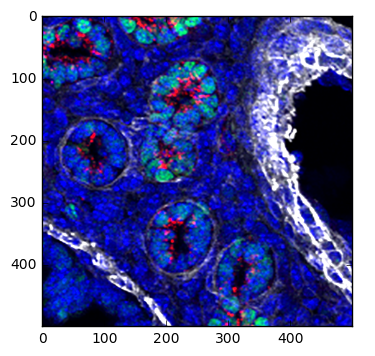

In [38]:
plt.imshow(im1)

In [17]:
w, h, d = im1.shape
cell_area = 500
n_segments = int(w*h/cell_area)
labels1 = slic(im1, n_segments=n_segments, compactness=10, sigma=10, 
               multichannel=True, convert2lab=True)
out1 = color.label2rgb(labels1, im1, kind='avg')

In [25]:
im2 = Image.open('/Users/lina/Downloads/2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_001.tif')

width,height = im2.size
for x in range(width):
    for y in range(height):
        r,g,b=im2.getpixel((x,y))
        if (b>r and b>g):
            im2.putpixel((x,y),0)
        if (g>r and g>b):
            im2.putpixel((x,y),0)
        if (b>150 and g > 150 and r > 150):
            im2.putpixel((x,y),0)

im3 = np.array(im2)
im4 = im3[1000:1500, 1000:1500]
im4 = rgb2gray(im4)

blobs_dog = blob_dog(im4, min_sigma=30, max_sigma=80, threshold=.5)
ksize = mean(blobs_dog[:, 2])
ksize = int(ksize)
if ksize % 2 == 0:
    ksize = ksize+1

im4_blur = cv2.GaussianBlur(im4, (ksize,ksize),0)

im4_gray = rgb2gray(im4_blur)
im4_gray = equalize_adapthist(im4_gray)

/Users/lina/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


/Users/lina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


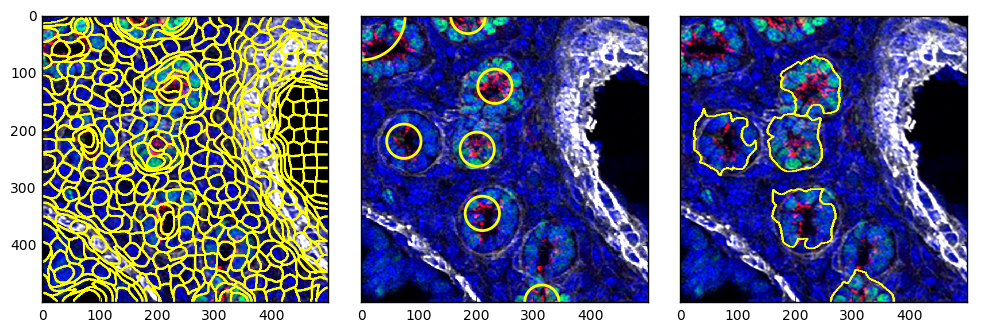

In [90]:
blobs_dog = blob_dog(im4_gray, min_sigma=30, max_sigma=100, threshold=.5)

mask = np.zeros(im1.shape[:2],dtype=np.int)
mask1 = labels1.copy()
for j in range(0,len(blobs_dog)):
    labels_square = np.unique(labels1[(blobs_dog[j][0]-int(blobs_dog[j][2])):(blobs_dog[j][0]+int(blobs_dog[j][2])), 
    (blobs_dog[j][1]-int(blobs_dog[j][2])):(blobs_dog[j][1]+int(blobs_dog[j][2]))])
    for i in range(0,len(labels_square)):
        mask[mask1==labels_square[i]] = j

fig, axes = plt.subplots(1, 3, figsize=(10,5), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].imshow(mark_boundaries(im1,labels1, outline_color=(1, 1, 0)))
axes[1].imshow(im1, interpolation='nearest', cmap='gray')
for blob in blobs_dog:
    y,x,r = blob
    x=int(x)
    y=int(y)
    r=int(r)
    c = plt.Circle((x, y), r, color="yellow", linewidth=2, fill=False)
    axes[1].add_patch(c)
axes[2].imshow(mark_boundaries(im1, mask, outline_color=(1, 1, 0)))

plt.tight_layout()

## Merge RAG

{122: {'weight': 57.543883712293947},
 123: {'weight': 68.965382617473409},
 154: {'weight': 54.382625772007493}}

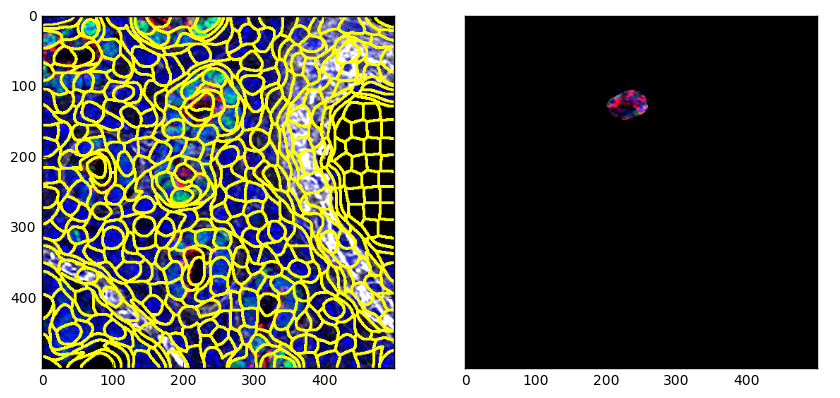

In [125]:
rag1 = rag.rag_mean_color(im1, labels1)
mask = np.zeros(im1.shape[:2], dtype = "uint8")
for i in range(130,131):
    mask[labels1==i] = 100

mask[labels1==122] = 100
mask[labels1==123] = 100
mask[labels1==154] = 100

region = cv2.bitwise_and(im1, im1, mask = mask)
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].imshow(mark_boundaries(im1,labels1, outline_color=(1, 1, 0)))
axes[1].imshow(region)

rag1[130]

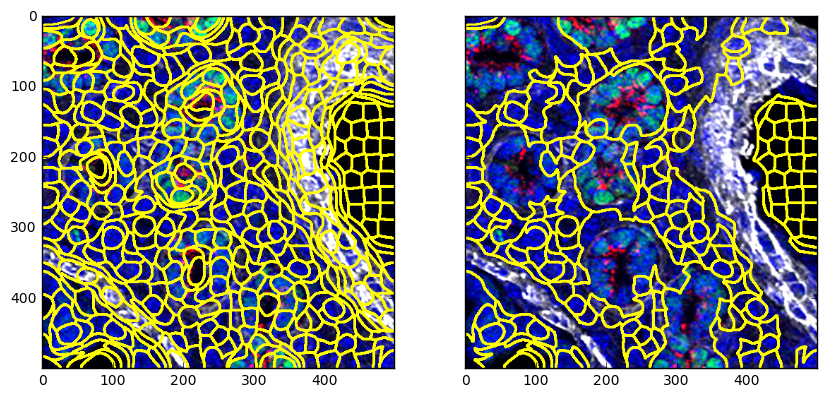

In [127]:
"""if mode == 'similarity':
    d['weight'] = math.e ** (-(diff ** 2) / sigma)"""
#default sigma==255
rag1 = rag.rag_mean_color(im1, labels1, mode='similarity')
labels2 = graph.cut_threshold(labels1, rag1, thresh=0.000001)

fig, axes = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].imshow(mark_boundaries(im1,labels1, outline_color=(1, 1, 0)))
axes[1].imshow(mark_boundaries(im1, labels2,outline_color=(1,1,0)))

## Integrate color information

In [150]:
from skimage.future.graph import rag_LY

426

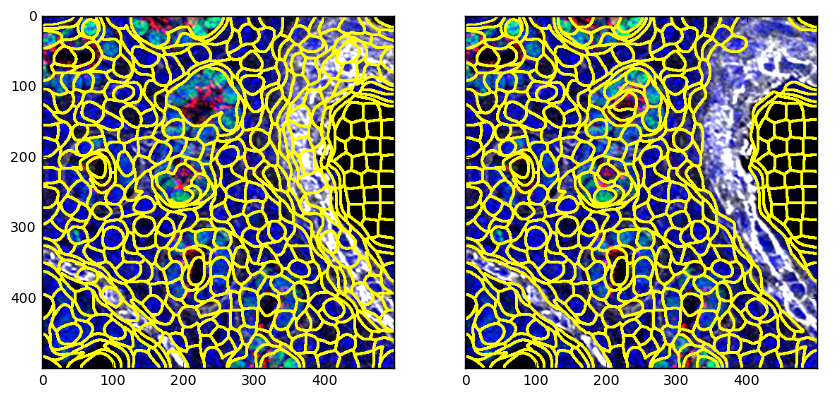

In [153]:
im1_HSV = cv2.cvtColor(im1, cv2.COLOR_RGB2HSV)

rag = rag_LY.rag_mean_color(im1_HSV, labels1,mode='green_red_percentage')
labels2 = graph.cut_threshold(labels1, rag, thresh=0.5)

rag2 = rag_LY.rag_mean_color(im1_blur_HSV, labels1,mode='white_percentage')
labels3 = graph.cut_threshold(labels1, rag2, thresh=0.5)

fig, axes = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].imshow(mark_boundaries(im1,labels2, outline_color=(1, 1, 0)))
axes[1].imshow(mark_boundaries(im1,labels3, outline_color=(1, 1, 0)))

len(np.unique(labels3))

## Color clustering

In [154]:
out1_HSV = cv2.cvtColor(out1, cv2.COLOR_RGB2HSV)
out1_HLS = cv2.cvtColor(out1, cv2.COLOR_RGB2HLS)
out1_Lab = cv2.cvtColor(out1, cv2.COLOR_RGB2Lab)
out1_Luv = cv2.cvtColor(out1, cv2.COLOR_RGB2Luv)
out1_YCrCb = cv2.cvtColor(out1, cv2.COLOR_RGB2YCrCb)

colors_name = ['out1', 'out1_HSV', 'out1_HLS', 'out1_Lab', 'out1_Luv', 'out1_YCrCb']
colors = [out1, out1_HSV, out1_HLS, out1_Lab, out1_Luv, out1_YCrCb]

out1_colors = {}
i=0
for col in colors:
    X = col.reshape((-1,3))
    df = pd.DataFrame(X)
    out1_colors['%s_uniq' % colors_name[i]] = df.drop_duplicates().values #get unique color value
    i=i+1

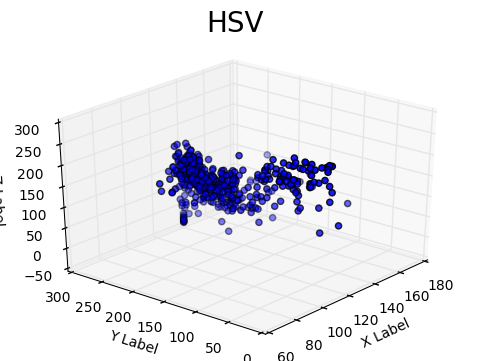

In [182]:
fig = plt.figure()
fig.suptitle('HSV', fontsize=20)
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, xs=out1_colors["out1_HSV_uniq"][:,0], ys=out1_colors["out1_HSV_uniq"][:,1], 
               zs=out1_colors["out1_HSV_uniq"][:,2], zdir='z', s=20, c='blue', depthshade=True)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(30,220)
plt.show()

### Hierarchical Clustering

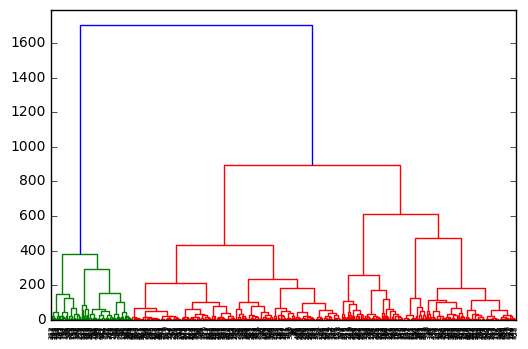

In [188]:
X1=linkage(out1_colors["out1_HSV_uniq"],method="ward")
dendrogram(X1)
pass

### Affinity propagation

Estimated number of clusters: 6


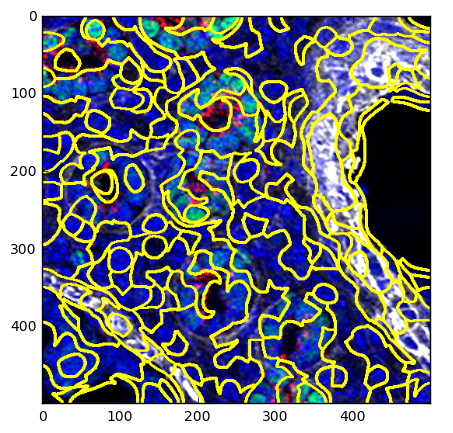

In [181]:
af = AffinityPropagation(damping=0.5,preference=-100000).fit(out1_colors["out1_uniq"])
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)

out1_sup = np.zeros((500,500))
for col, i in zip(af.labels_, out1_colors["out1_uniq"]):
    index = out1 == i
    out1_sup[np.where(index)[0:2]] = col

out2 = color.label2rgb(out1_sup, im1, kind='avg')
plt.figure(figsize=(10,5))
plt.imshow(mark_boundaries(im1, out1_sup.astype(int),outline_color=(1,1,0)))